In [23]:
!pip install pandas
!pip install openpyxl
!pip install scipy
!pip install statsmodels
!pip install scikit-learn


[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 10.6/10.6 MB 1.1 MB/s eta 0:00:00
     ------------------------------------ 302.2/302.2 kB 983.1 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import os

excel_files = os.path.join(os.getcwd(), 'data')
combined_df = pd.DataFrame()

for file_name in os.listdir(excel_files):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(excel_files, file_name)

        df_borough = pd.read_excel(file_path, header=None, skiprows=7)
        df_borough.columns = [
            "BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "BLOCK", 
            "LOT", "EASEMENT", "BUILDING CLASS AT PRESENT", "ADDRESS", "APARTMENT NUMBER", 
            "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", 
            "GROSS SQUARE FEET", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", 
            "BUILDING CLASS AT TIME OF SALE", "SALE PRICE", "SALE DATE"
        ]

        year = int(file_name.split('_')[0])
        df_borough['Year'] = year
        combined_df = pd.concat([combined_df, df_borough], ignore_index=True)

combined_df.to_csv('combined_sales.csv', index=False)

In [33]:
#3) Q1 House price of each borough
combined_df = pd.read_csv('combined_sales.csv')
combined_df['SALE PRICE'] = pd.to_numeric(combined_df['SALE PRICE'], errors='coerce')
borough_stats = combined_df.groupby(['BOROUGH', 'Year'])['SALE PRICE'].describe()

print("\nStatistics of House Prices for Each Borough:")
print(borough_stats)



Statistics of House Prices for Each Borough:
                count          mean           std  min       25%       50%  \
BOROUGH Year                                                                 
1.0     2021  22756.0  3.021417e+06  1.566200e+07  0.0  462000.0  965000.0   
        2022  21787.0  3.293709e+06  2.267137e+07  0.0  410000.0  937500.0   
        2023  16269.0  2.805843e+06  1.325977e+07  0.0  365000.0  930000.0   
2.0     2021   7692.0  8.173122e+05  3.377169e+06  0.0       0.0  350000.0   
        2022   7300.0  8.793488e+05  3.857280e+06  0.0       0.0  360718.0   
        2023   5604.0  7.998377e+05  3.836253e+06  0.0       0.0  280000.0   
3.0     2021  28965.0  1.244181e+06  4.581395e+06  0.0       0.0  640000.0   
        2022  26855.0  1.267161e+06  5.429963e+06  0.0       0.0  635000.0   
        2023  20304.0  1.064308e+06  4.216937e+06  0.0       0.0  498232.5   
4.0     2021  29812.0  7.225875e+05  3.080978e+06  0.0       0.0  411323.0   
        2022  2884

In [37]:
#3) Q1 Types of houses involved in the dataset
house_types = combined_df['BUILDING CLASS CATEGORY'].unique()

print("Types of Houses Involved in the Dataset:")
for house_type in house_types:
    print(house_type)

Types of Houses Involved in the Dataset:
nan
01 ONE FAMILY DWELLINGS
02 TWO FAMILY DWELLINGS
03 THREE FAMILY DWELLINGS
05 TAX CLASS 1 VACANT LAND
08 RENTALS - ELEVATOR APARTMENTS
10 COOPS - ELEVATOR APARTMENTS
21 OFFICE BUILDINGS
22 STORE BUILDINGS
26 OTHER HOTELS
27 FACTORIES
29 COMMERCIAL GARAGES
30 WAREHOUSES
31 COMMERCIAL VACANT LAND
41 TAX CLASS 4 - OTHER
04 TAX CLASS 1 CONDOS
06 TAX CLASS 1 - OTHER
07 RENTALS - WALKUP APARTMENTS
14 RENTALS - 4-10 UNIT
39 TRANSPORTATION FACILITIES
09 COOPS - WALKUP APARTMENTS
12 CONDOS - WALKUP APARTMENTS
43 CONDO OFFICE BUILDINGS
13 CONDOS - ELEVATOR APARTMENTS
32 HOSPITAL AND HEALTH FACILITIES
37 RELIGIOUS FACILITIES
38 ASYLUMS AND HOMES
46 CONDO STORE BUILDINGS
28 COMMERCIAL CONDOS
36 OUTDOOR RECREATIONAL FACILITIES
35 INDOOR PUBLIC AND CULTURAL FACILITIES
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC
33 EDUCATIONAL FACILITIES
44 CONDO PARKING
17 CONDO COOPS
47 CONDO NON-BUSINESS STORAGE
11 SPECIAL CONDO BILLING LOTS
15 CONDOS - 2-10 UNIT RESIDENTI

In [36]:
#3) Q1 Missing values in provided dataset
missing_values = combined_df.isnull().sum()

print("Missing Values in the Combined Dataset:")
print(missing_values)


Missing Values in the Combined Dataset:
BOROUGH                               10
NEIGHBORHOOD                          10
BUILDING CLASS CATEGORY               10
TAX CLASS AT PRESENT                 357
BLOCK                                 10
LOT                                   10
EASEMENT                          264350
BUILDING CLASS AT PRESENT            357
ADDRESS                               10
APARTMENT NUMBER                  198893
ZIP CODE                              27
RESIDENTIAL UNITS                  64191
COMMERCIAL UNITS                  113754
TOTAL UNITS                        55937
LAND SQUARE FEET                  122008
GROSS SQUARE FEET                 122008
YEAR BUILT                         18017
TAX CLASS AT TIME OF SALE             10
BUILDING CLASS AT TIME OF SALE        10
SALE PRICE                            10
SALE DATE                             10
Year                                   0
dtype: int64


#3) Q2 Post COVID-19 Question 1
Question: Are there significant differences in average house prices between the two boroughs before and after the COVID-19?

Why This Question: Due to COVID-19, there has been a lot of changes to the world especially house prices. By understanding if the changes are significant, we are provided more insight
that helps us decide whether we need to make adjustments

Null Hypothesis, H0: There is no significant change in average house prices between the selected boroughs before and after COVID-19
Alternative Hypothesis, H1: There is a significant change in average house prices between the selected boroughs before and after COVID-19

Test To Use: Two-sample test, comparing the means of two independent groups which are average house prices for Brooklyn and Manhattan before and after Covid-19

Results: There are significant differences in average house prices between the two boroughs which we can confirm from the p-value being 0 and the t-statistic suggest a substantial difference between the average house prices in Brooklyn and Manhattan after COVID-19. Thus, there is enough evidence to prove the alternative hypothsis, H1.

In [31]:
#3) Q2 Post COVID-19 Question 1

import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

brooklyn_data_pre = pd.read_excel('2018_brooklyn.xlsx')
manhattan_data_pre = pd.read_excel('2018_manhattan.xlsx')
combined_df = pd.read_csv('combined_sales.csv')

brooklyn_data_pre.columns = brooklyn_data_pre.columns.str.strip()
manhattan_data_pre.columns = manhattan_data_pre.columns.str.strip()
combined_df.columns = combined_df.columns.str.strip()

brooklyn_data_post = combined_df[combined_df['BOROUGH'] == 3].copy()
manhattan_data_post = combined_df[combined_df['BOROUGH'] == 1].copy()

brooklyn_data_post['SALE DATE'] = pd.to_datetime(brooklyn_data_post['SALE DATE'])
manhattan_data_post['SALE DATE'] = pd.to_datetime(manhattan_data_post['SALE DATE'])

covid_start_date = pd.to_datetime('2021-01-01')

brooklyn_pre = brooklyn_data_pre[brooklyn_data_pre['SALE DATE'] < covid_start_date]
manhattan_pre = manhattan_data_pre[manhattan_data_pre['SALE DATE'] < covid_start_date]

brooklyn_post = brooklyn_data_post[brooklyn_data_post['SALE DATE'] >= covid_start_date]
manhattan_post = manhattan_data_post[manhattan_data_post['SALE DATE'] >= covid_start_date]

prices_brooklyn_pre = brooklyn_pre['SALE PRICE']
prices_manhattan_pre = manhattan_pre['SALE PRICE']

prices_brooklyn_post = brooklyn_post['SALE PRICE']
prices_manhattan_post = manhattan_post['SALE PRICE']

t_stat, p_value_ttest = ttest_ind(prices_brooklyn_post, prices_manhattan_post)
u_stat, p_value_mannwhitneyu = mannwhitneyu(prices_brooklyn_post, prices_manhattan_post)

print(f'Two-Sample T-Test: t-statistic = {t_stat}, p-value = {p_value_ttest}')
print(f'Mann-Whitney U Test: U-statistic = {u_stat}, p-value = {p_value_mannwhitneyu}')


Two-Sample T-Test: t-statistic = -27.309863218891614, p-value = 8.934047313102915e-164
Mann-Whitney U Test: U-statistic = 1704360963.0, p-value = 0.0


#3) Q2 Post COVID-19 Question 2

Question: Is there a correlation between the recovery of house prices and the year built for properties in the two individual boroughs post COVID-19

Why This Question: This question would help understand the relationship between the house prices and age of properties. This will help gain insight into how newer or older properties are affect with COVID-19.

Null Hypothesis, H0: There is no significant correlation between the house prices and the year built for properties after COVID-19
Alternative Hypothesis, H1: There is a signification correlation between the house prices and the year built for properties after COVID-19

Test To Use: Regression Analysis would be a good test to examine the correlation between the house prices and the year built. We can identify negative or positive trends as well as quantify how the year built which is our independent variable is associated with the house prices which is our dependent variable.

Results: There is evidence to suggest that there is a correlation between the house prices and the year built for properties in the selected boroughs after COVID-19. This is because there is a positive coefficient for the independent variable, Year Built, which means there is a positive correlation between the dependent variable, Sale Price. Since there is a P-value is close to 0.000, we can suggest a significant relationship. Thus, this test proves the alternative hypothsis, H1.


In [13]:
#3) Q2 Post COVID-19 Question 2

import pandas as pd
import statsmodels.api as sm

combined_df = pd.read_csv('combined_sales.csv')

selected_boroughs = [1, 3] 
filtered_data = combined_df[combined_df['BOROUGH'].isin(selected_boroughs)]
filtered_data = filtered_data[filtered_data['SALE DATE'] >= '2021-01-01']

independent_variable = 'YEAR BUILT'
dependent_variable = 'SALE PRICE'

filtered_data = filtered_data.dropna(subset=[independent_variable, dependent_variable])

X = filtered_data[independent_variable]
y = filtered_data[dependent_variable]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             SALE PRICE   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     130.4
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           3.49e-30
Time:                        04:13:56   Log-Likelihood:            -2.2287e+06
No. Observations:              125366   AIC:                         4.457e+06
Df Residuals:                  125364   BIC:                         4.457e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.788e+07   1.74e+06    -10.277      0.0

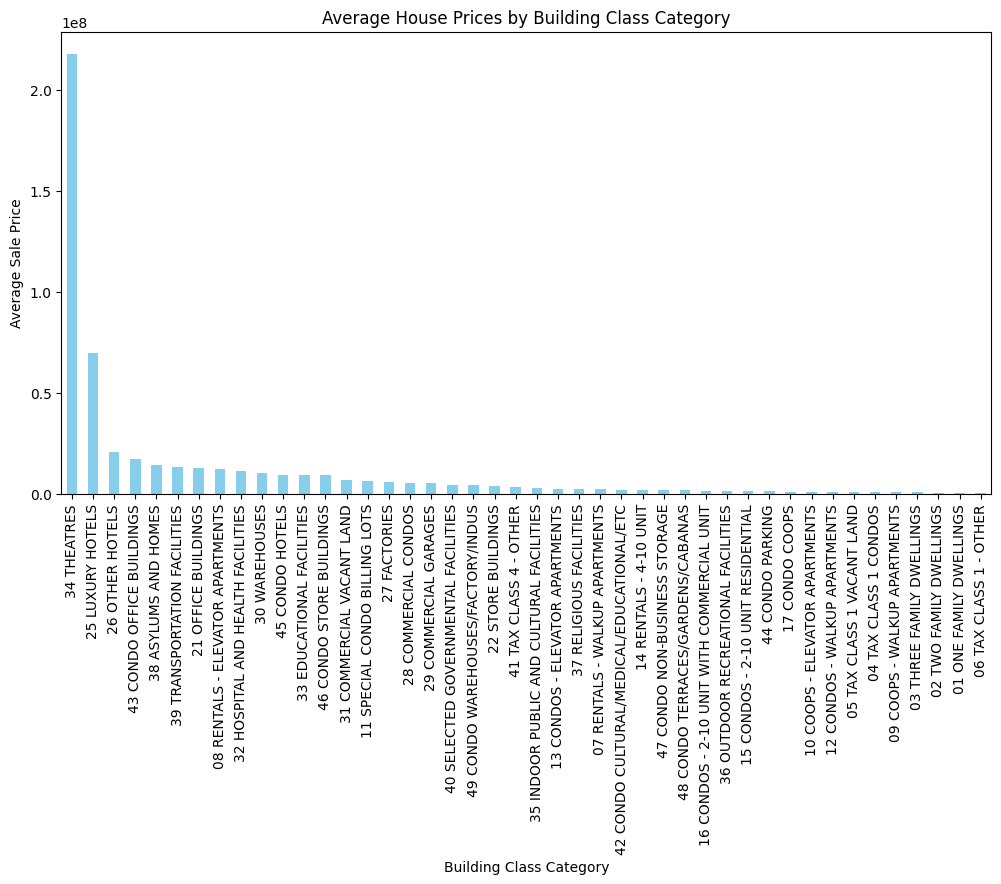

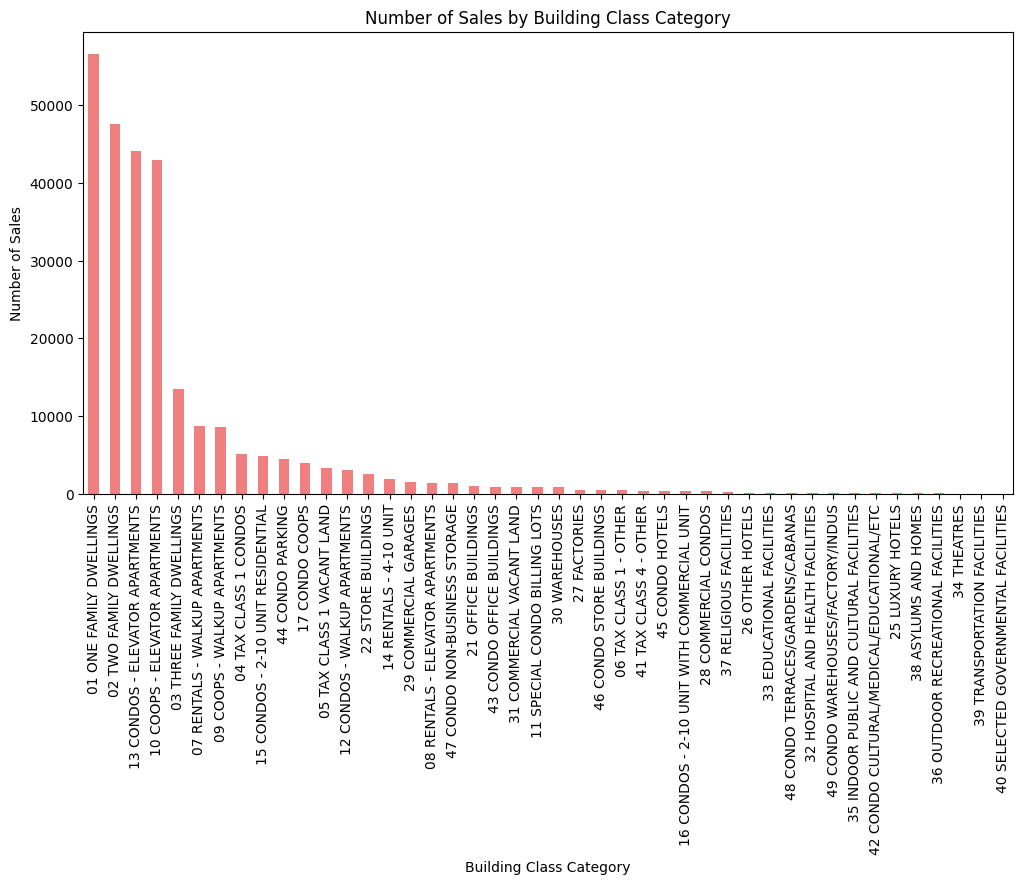

In [20]:
#3) Q3 Comparing Average House Prices and House Sales (Code)
import pandas as pd
import matplotlib.pyplot as plt

combined_df = combined_df.dropna(subset=['SALE PRICE'])

average_prices = combined_df.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average House Prices by Building Class Category')
plt.xlabel('Building Class Category')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=90)
plt.show()

sales_counts_by_category = combined_df['BUILDING CLASS CATEGORY'].value_counts()

plt.figure(figsize=(12, 6))
sales_counts_by_category.plot(kind='bar', color='lightcoral')
plt.title('Number of Sales by Building Class Category')
plt.xlabel('Building Class Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.show()

3) Q3 Comparing Average House Prices and House Sales (Report)

Looking at the first graph, average house prices, we can see the more expensive and cheaper categories. Theatres seem to be the most expensize by a large margin between the second more expensive category which is luxury hotels. The luxury hotels has a solid margin too but all the other categories follow a similar price range with Tax class being the cheapest. With this information, we can understand the price demands for each property and how they compare with others.

For the second graph, average house sales, the categories 01, 02, 13 and 10 seem to be in the class of their own having the most amount of sales. By looking at the categories, we can see that more residental houses are being sold than any other kind of properties such as amenities or government facilities. The one, two and three family dwellings categories seem to have the most sales but have the lowest house prices. This can give more insight with affordability and market demand in the economy. It shows it can be more affordable for homebuyers or individuals looking for a cheap option to rent and this also means a strong demand for residental properties to come which real estate investors can take advantage of.

4) Q1

I chose to focus on the columns 'Borough', 'Neighborhood', 'Building Class Category', 'Land Square Feet', and 'Year built' because this subset would most likey have an impact on house sale prices. The borough and neighborhood columns were chosen because properties and their prices have a substantial impact due to their location. Building class category was chosen here because as seen in the previous questions we can see the price dynamics between sales and prices. Land square feet is a very cruicial criteria that affects the property price. Year built is also an important criteria for price too where a newer property may cost more than a cheaper one.

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\joshu\AppData\Local\Temp\ipykernel_1484\1194855092.py", line 31, in <module>
    test_data['SALE PRICE'] = test_data['SALE PRICE'].map(lambda c: train_data['SALE PRICE'].max() + 1 if pd.isnull(c) else train_data['SALE PRICE'].get_loc(c))
                              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\joshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\series.py", line 4680, in map
    new_values = self._map_values(arg, na_action=na_action)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\joshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\base.py", line 921, in _map_val

: 